In [1]:
import numpy as np
import scipy as scp
import pylab as pyl
import pandas as pd
import bokeh as bk
import bokeh.plotting as bkp

bkp.output_notebook()
#import pandas_bokeh
#pandas_bokeh.output_notebook()

Loading BokehJS ...

# ADEME_S1 à ADEME_S4
Interpolation linéaire des scénaries de 2025 à 2050 par pas de 5 ans

## ADEME 2050 S1 à S4

In [2]:
def cumul_plot(T, cols, palette=bk.palettes.Category10_10):
    couleurs = iter(palette)
    source = bk.models.ColumnDataSource(T)
    fig = bkp.figure()
    fig.varea_stack(stackers=cols, x="Horodatage", color=[next(couleurs) for col in cols], legend_label=cols, source=source )
    fig.legend.click_policy = "mute"    
    bkp.show(fig)


In [3]:
ADEME2050 = pd.read_csv("chroniques-horaires-de-la-consommation-d'electricite.csv")

ADEME2050.rename({ADEME2050.columns[4]: "e2050"}, axis=1, inplace=True)
ADEME2050["e2050"] = pd.to_numeric(ADEME2050["e2050"].str.replace(',', '.'))
print(ADEME2050.columns)
ADEME2050.insert(loc=4, column='d2050', value=ADEME2050.iloc[:,[2, 3]].sum(axis=1))
print(ADEME2050.columns)

ADEME2050.drop(columns=ADEME2050.columns[[2,3]], inplace=True)
ADEME2050.set_index(['Horodatage'], inplace=True)
#pd.to_datetime(ADEME2050[["Horodatage"]])
#ADEME2050.set_index(["Scénario","Horodatage"], inplace=True)
#print(ADEME2050.head())
#pd.to_datetime(ADEME2050[["Horodatage"]]).day*24 + pd.to_datetime(ADEME2050[["Horodatage"]]).hour 
#ADEME2050.drop(columns=["Horodatage"], inplace=True)
#ADEME2050.insert(loc=0, column="heures", 
 #                value=T1["heures"].tolist() * len(ADEME2050["Scénario"].unique()))
#ADEME2050.groupby("Scénario").describe()

Index(['Scénario', 'Horodatage', 'Demande directe non pilotable',
       'Demande directe pilotable', 'e2050'],
      dtype='object')
Index(['Scénario', 'Horodatage', 'Demande directe non pilotable',
       'Demande directe pilotable', 'd2050', 'e2050'],
      dtype='object')


In [4]:
for nom, group in ADEME2050.groupby("Scénario"):
    print(nom)
    print(group.describe())
    print(group.index.is_monotonic_increasing)
    #cumul_plot(group, cols=group.columns.tolist()[1:])
    print(group[["d2050","e2050"]].sum().sum())

S1
             d2050         e2050
count  8760.000000  8.760000e+03
mean     38.927280  7.909959e+00
std      11.199089  1.069097e+01
min      17.852749  1.023440e-10
25%      30.655466  4.088539e-01
50%      37.851607  4.090182e-01
75%      45.292254  1.765474e+01
max      91.609838  2.720755e+01
True
410294.2138425994
S2
             d2050         e2050
count  8760.000000  8.760000e+03
mean     44.057864  1.600812e+01
std      11.400370  1.579146e+01
min      20.998007  2.769410e-10
25%      35.293158  5.757742e+00
50%      43.459005  8.779163e+00
75%      51.174528  2.801626e+01
max      94.342464  4.582176e+01
True
526177.982214924
S3Enr
             d2050         e2050
count  8760.000000  8.760000e+03
mean     66.277096  8.789603e+00
std      17.171094  6.724212e+00
min      30.544315  1.824650e-10
25%      53.442241  5.536506e+00
50%      64.938216  6.561460e+00
75%      77.492507  1.769360e+01
max     140.554904  1.818649e+01
True
657584.2802580397
S3Nuke
             d2050    

## ADEME 2025 (fichier marion)

In [5]:
fich = "ADEME_25-50_marion.csv"
df2025 = pd.read_csv(fich, header=None)
df2025.columns = ["heures", "d2025", "d2030", "d2035", "d2040", "d2045", "d2050" ]
df2025.set_index(["heures"], inplace=True)
print(df2025.index.is_monotonic_increasing)
print(df2025.describe())
#scenar2025 = df2025[["heures", "d2025"]]
df2025.insert(loc= 2, column="e2025", value=df2025["d2025"] * 0.)

print("Demande en 2025")
print(df2025.describe())

conso_marion = df2025["d2025"].sum()
print(conso_marion)



True
             d2025        d2030        d2035        d2040        d2045  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean     48.216612    49.180944    50.145277    51.109609    52.073941   
std      13.492965    13.762824    14.032684    14.302543    14.572402   
min      16.833074    17.169735    17.506396    17.843058    18.179719   
25%      37.890636    38.648448    39.406261    40.164074    40.921886   
50%      48.344286    49.311171    50.278057    51.244943    52.211829   
75%      57.788214    58.943978    60.099742    61.255507    62.411271   
max      96.041075    97.961896    99.882718   101.803539   103.724361   

             d2050  
count  8760.000000  
mean     53.038273  
std      14.842262  
min      18.516381  
25%      41.679699  
50%      53.178714  
75%      63.567035  
max     105.645183  
Demande en 2025
             d2025        d2030   e2025        d2035        d2040  \
count  8760.000000  8760.000000  8760.0  8760.000000  

## Correction du scenario marion pour coller à 2024 de RTE :

Conso de 449 TWh et exportation nette de 89 TWh

Solde mensuel 2024 de RTE sur  https://analysesetdonnees.rte-france.com/marches/echanges-commerciaux

d2025    511347.521951
d2030    430825.072390
e2025         0.000000
d2035    439272.622829
d2040    447720.173268
d2045    456167.723707
d2050    464615.274146
dtype: float64


<Axes: >

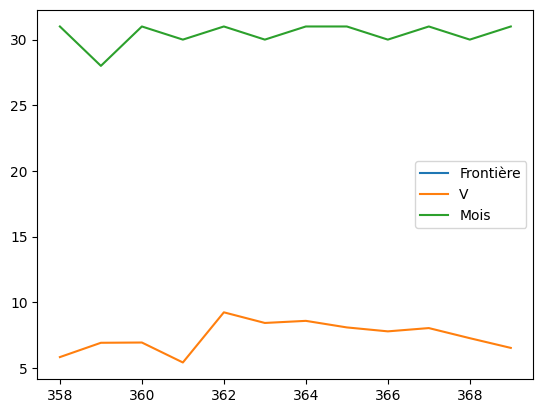

In [16]:
conso_rte2024 = (449. + 89.) *1000.

df2024 = df2025.copy()



export = pd.read_csv("Solde_mensuel_des_importations_et_exportations_entre_la_France_et_ses_voisins__2025-03-26_18-51.csv", sep=";")

ech2024 = export[export["Filière"]=="Soldes des échanges"]
ech2024 = ech2024[ech2024["Date"].apply(lambda v : v[0:4]=="2024")]
ech2024["V"] = pd.to_numeric(ech2024["Valeur (TWh)"].str.replace(',', '.'))
ech2024["Mois"]=[31,28,31,30,31,30,31,31,30,31,30,31]




h=0
for index, row in ech2024.iterrows():
    duree = row["Mois"]*24
    #df2024.loc[h:h+row["Mois"],"d2025"] = df2024.iloc[h:h+row["Mois"]]["d2025"].apply(lambda v: v*row["V"]*1000./duree)
    df2024.loc[h:h+duree,"d2025"] = df2025.iloc[h:h+duree]["d2025"].apply(lambda v: v+row["V"]*1000./duree)
    h=h+duree
    #df2024.iloc[h:h+row["Mois"]]["d2024"].apply(lambda v: v+1)

print(df2024.sum())

ech2024.plot()


## Interpolation de 2025 à 2050

In [17]:

scenars={}
for nom, group in ADEME2050.groupby("Scénario"):
    print(nom)
    group.insert(loc=1, column="heures", value=df2025.index.tolist())
    for annee in range(2045,2020,-5):
        alpha = float(annee-2025.)/float(2050-2025)
        for dem_elec in ["e","d"]:
            liste50 = group[dem_elec+"2050"].values
            liste25 = df2024[dem_elec+"2025"].values
            group.insert(loc=2, 
                         column = dem_elec+annee.__str__(), 
                         value = [a*(1.-alpha) + b*alpha for a, b in zip(liste25, liste50)]
                        )
    scenars[nom]=group.drop(columns="Scénario")
    print(group.sum()) 
    print("======================================================")

    scenars[nom].to_csv(nom+"_25-50.csv", index=False)

S1
Scénario    S1S1S1S1S1S1S1S1S1S1S1S1S1S1S1S1S1S1S1S1S1S1S1...
heures                                               38364420
d2025                                           511347.521951
e2025                                                     0.0
d2030                                            477278.61227
e2030                                            13858.248059
d2035                                           443209.702589
e2035                                            27716.496118
d2040                                           409140.792909
e2040                                            41574.744177
d2045                                           375071.883228
e2045                                            55432.992236
d2050                                           341002.973547
e2050                                            69291.240296
dtype: object
S2
Scénario    S2S2S2S2S2S2S2S2S2S2S2S2S2S2S2S2S2S2S2S2S2S2S2...
heures                                            

In [18]:
def une_annee_df(df, annee):
    longdf = df[["heures"]]
    longdf.insert(loc=1, column='date', value= pd.to_datetime(annee+"-01-01") + pd.to_timedelta(df['heures'], unit='h'))
    longdf.insert(loc=2, column='demande', value= df["d"+annee].values)
    longdf.insert(loc=3, column='electrolyse', value= df["e"+annee].values)
    return longdf

In [19]:
import os
mix_data="./"
filenames = os.listdir(mix_data)
fichiers = [ filename for filename in filenames if filename.endswith("_25-50.csv") ]

for fichier in fichiers:
    print(fichier)
    dfinit = pd.read_csv(mix_data+fichier)
    print(dfinit.sum())
    if 'e2025' not in dfinit.columns:
        dfinit.insert(1,'e2025',dfinit["heures"]*0.)
           
    df = une_annee_df(dfinit,'2025')
    zeros = dfinit["heures"]*0.
    for column in dfinit.columns:
        annee = column[1:]
        if 'e'+annee not in dfinit.columns:
            dfinit.insert(1,'e'+annee,zeros)
        if column[0]=='d' and annee != "2025":
            df = pd.concat([df, une_annee_df(dfinit,annee)], ignore_index= True)     
    df.drop(columns=["heures"], inplace=True)
    df.set_index(["date"], inplace=True)
    print(df.sum())         
    df.to_hdf(mix_data+fichier[:-4]+'.h5', key='df', mode='w')  
    #os.remove(mix_data+fichier)
    

S1_25-50.csv
heures    3.836442e+07
d2025     5.113475e+05
e2025     0.000000e+00
d2030     4.772786e+05
e2030     1.385825e+04
d2035     4.432097e+05
e2035     2.771650e+04
d2040     4.091408e+05
e2040     4.157474e+04
d2045     3.750719e+05
e2045     5.543299e+04
d2050     3.410030e+05
e2050     6.929124e+04
dtype: float64
demande        2.557051e+06
electrolyse    2.078737e+05
dtype: float64
S3Enr_25-50.csv
heures    3.836442e+07
d2025     5.113475e+05
e2025     0.000000e+00
d2030     5.251955e+05
e2030     1.539938e+04
d2035     5.390435e+05
e2035     3.079877e+04
d2040     5.528914e+05
e2040     4.619815e+04
d2045     5.667394e+05
e2045     6.159754e+04
d2050     5.805874e+05
e2050     7.699692e+04
dtype: float64
demande        3.275805e+06
electrolyse    2.309908e+05
dtype: float64
S4_25-50.csv
heures    3.836442e+07
d2025     5.113475e+05
e2025     0.000000e+00
d2030     5.672938e+05
e2030     7.514821e+03
d2035     6.232401e+05
e2035     1.502964e+04
d2040     6.791864e+05
e204

In [20]:
 df.to_hdf(mix_data+fichier[:-4]+'.h5', key='df', mode='w')  

## Déploiement

Copier tout les _25-50.h5 dans ../  soit /climix/mix_data

In [21]:
cp *.h5 ../../geographe/FR_metro/